In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv("housing.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data.dropna(inplace= True)

In [5]:
from sklearn.model_selection import train_test_split
X= data.drop(['median_house_value'], axis=1)
y= data['median_house_value']

In [6]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)

In [7]:
train_data = X_train.join(y_train)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

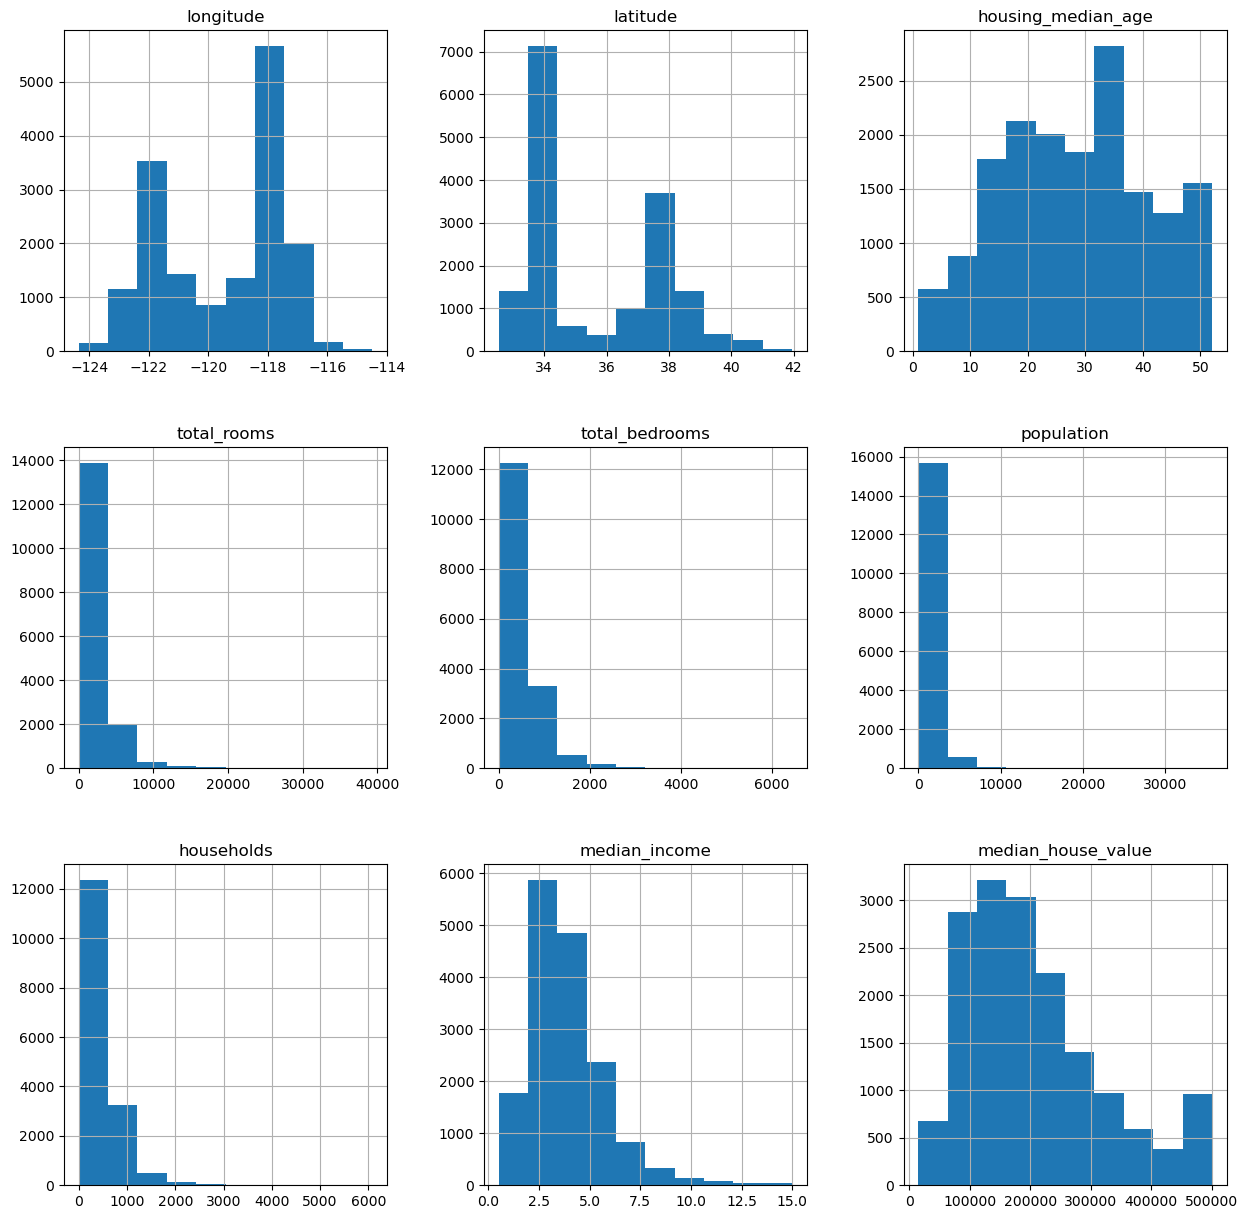

In [8]:
train_data.hist(figsize= (15,15))

<AxesSubplot:>

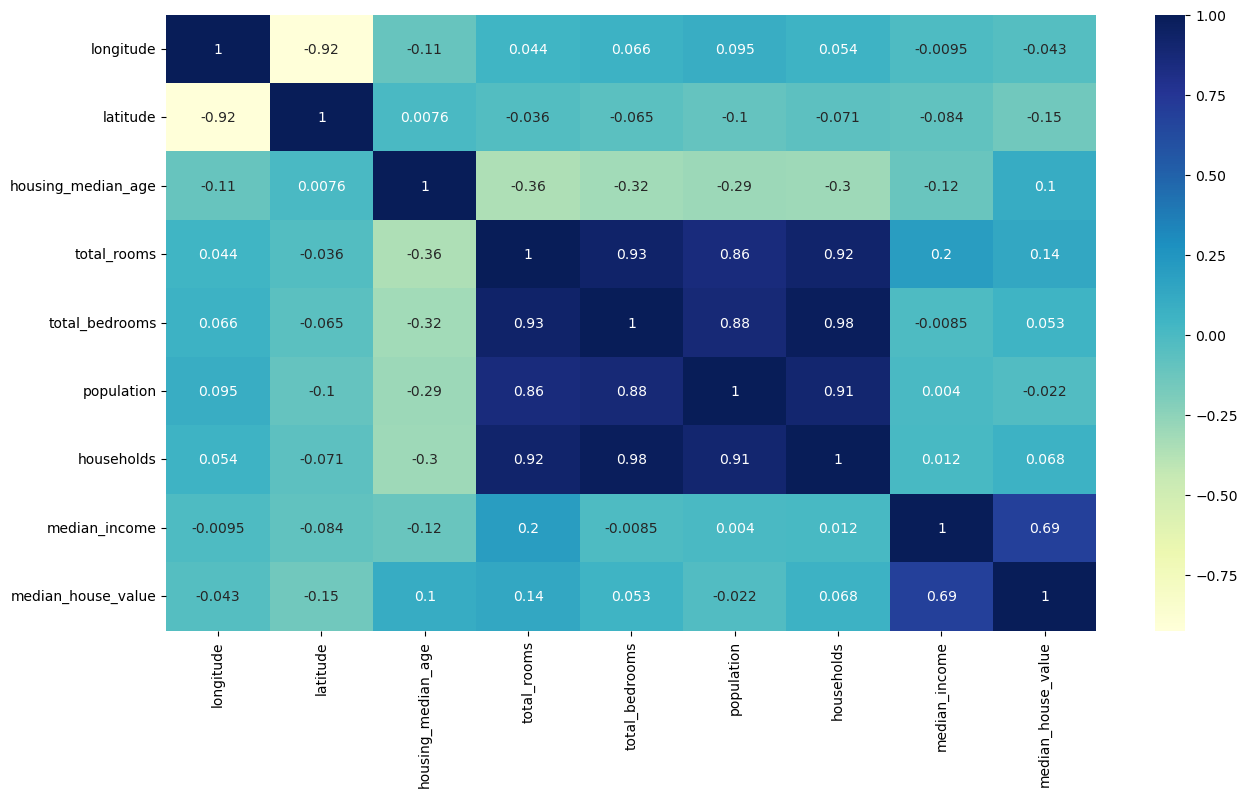

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")

In [10]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

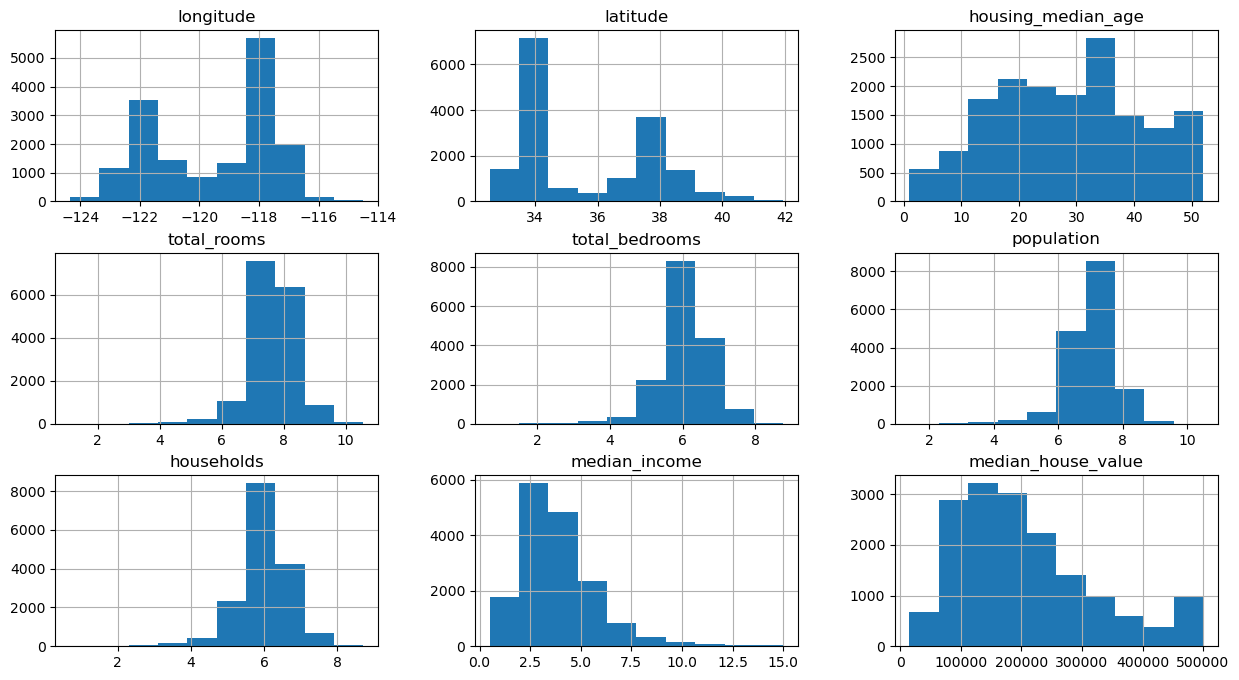

In [11]:
train_data.hist(figsize=(15,8))

In [12]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7233
INLAND        5189
NEAR OCEAN    2099
NEAR BAY      1822
ISLAND           3
Name: ocean_proximity, dtype: int64

In [13]:
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14798,0,0,0,0,1
13633,0,1,0,0,0
8799,0,0,0,0,1
10918,1,0,0,0,0
19745,0,1,0,0,0
...,...,...,...,...,...
16022,0,0,0,1,0
543,0,0,0,1,0
7510,1,0,0,0,0
2203,0,1,0,0,0


In [14]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [15]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14798,-117.11,32.59,17.0,7.611348,6.282267,7.333023,6.216606,2.1773,143200.0,0,0,0,0,1
13633,-117.34,34.08,35.0,7.230563,5.517453,6.594413,5.579730,3.2305,93700.0,0,1,0,0,0
8799,-118.37,33.77,26.0,8.754634,6.776507,7.840313,6.781058,10.1447,500001.0,0,0,0,0,1
10918,-117.86,33.73,38.0,7.734121,6.238325,7.804659,6.224558,3.3125,159100.0,1,0,0,0,0
19745,-122.35,40.25,10.0,7.391415,5.765191,6.765039,5.648974,3.5000,104300.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16022,-122.46,37.73,52.0,7.784057,5.849325,6.700731,5.796058,6.8322,394100.0,0,0,0,1,0
543,-122.28,37.78,50.0,7.305188,5.726848,6.594413,5.793014,2.5139,219000.0,0,0,0,1,0
7510,-118.27,33.89,32.0,7.585789,5.986452,7.207860,5.916202,4.4659,138100.0,1,0,0,0,0
2203,-119.85,36.82,9.0,8.293049,6.658011,7.433667,6.569481,3.3239,91300.0,0,1,0,0,0


<AxesSubplot:>

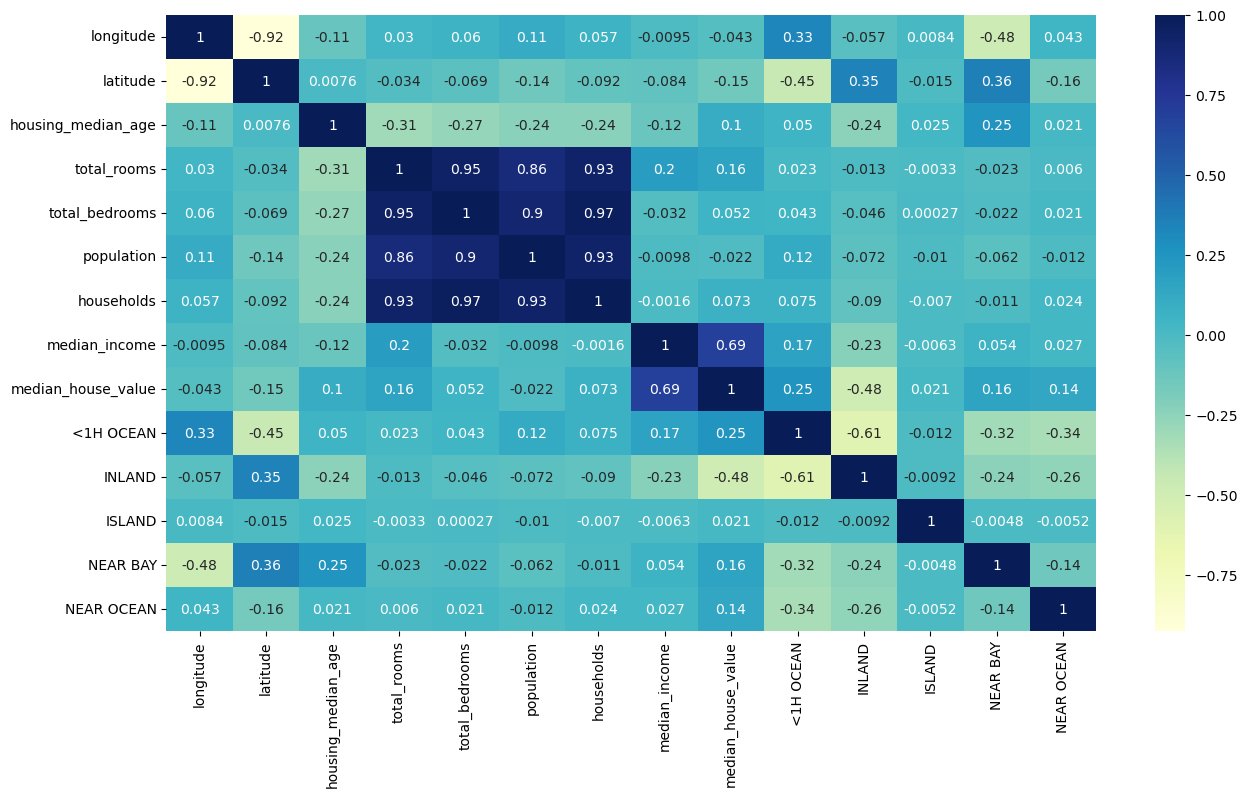

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

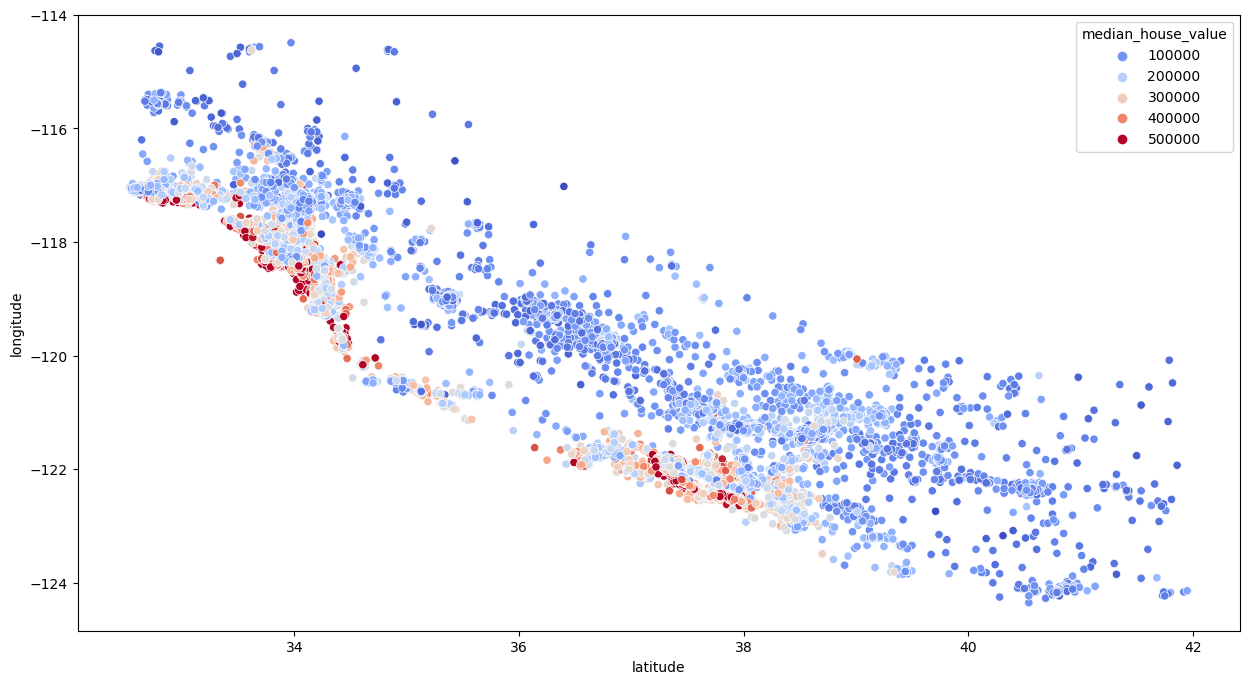

In [17]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude", data=train_data, hue="median_house_value",palette= "coolwarm")

In [20]:
train_data['bedroom_ratio']= train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

<AxesSubplot:>

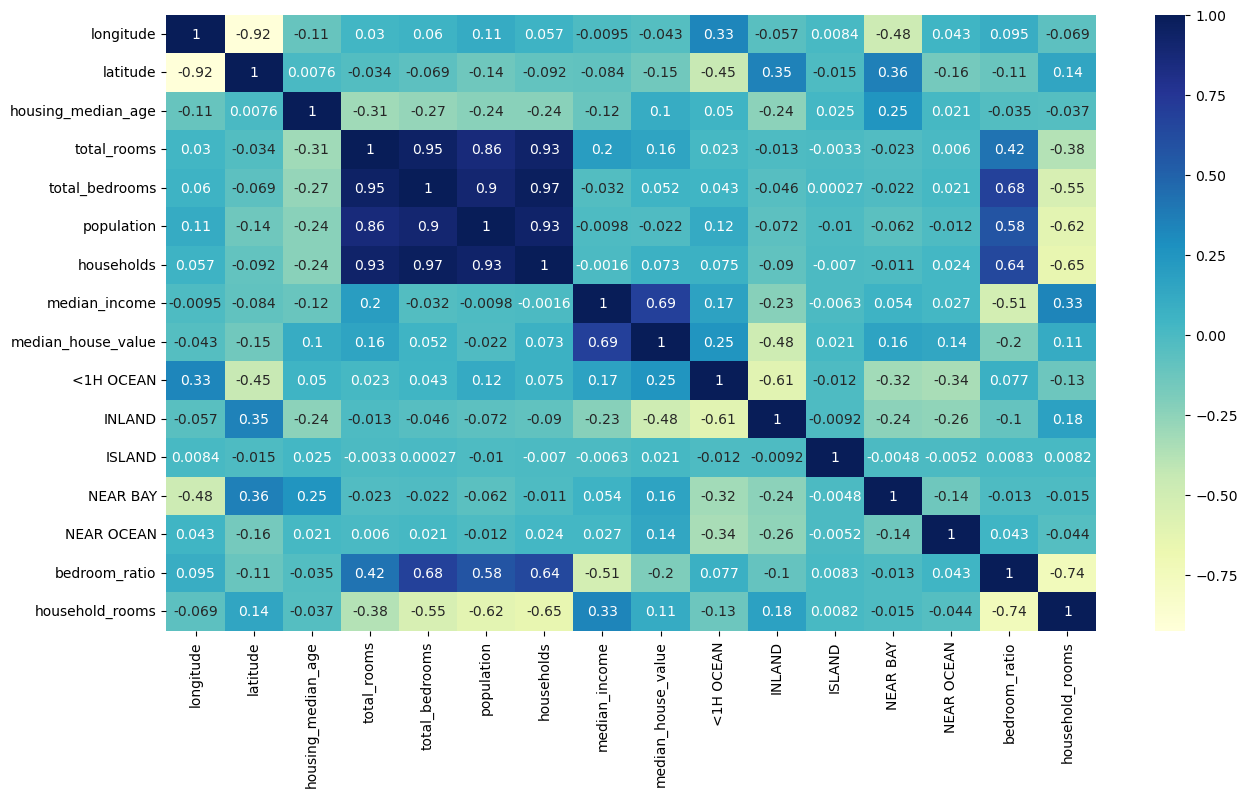

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1),train_data['median_house_value']
X_train_s= scaler.fit_transform(X_train)

regresyon= LinearRegression()
regresyon.fit(X_train_s, y_train)


LinearRegression()

In [22]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] +1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] +1)
test_data['population'] = np.log(test_data['population'] +1)
test_data['households'] = np.log(test_data['households'] +1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio']= test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']



In [23]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']


In [25]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
14798,-117.11,32.59,17.0,7.611348,6.282267,7.333023,6.216606,2.1773,143200.0,0,0,0,0,1,0.825382,1.224357
13633,-117.34,34.08,35.0,7.230563,5.517453,6.594413,5.579730,3.2305,93700.0,0,1,0,0,0,0.763074,1.295863
8799,-118.37,33.77,26.0,8.754634,6.776507,7.840313,6.781058,10.1447,500001.0,0,0,0,0,1,0.774048,1.291043
10918,-117.86,33.73,38.0,7.734121,6.238325,7.804659,6.224558,3.3125,159100.0,1,0,0,0,0,0.806598,1.242517
19745,-122.35,40.25,10.0,7.391415,5.765191,6.765039,5.648974,3.5000,104300.0,0,1,0,0,0,0.779985,1.308453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16022,-122.46,37.73,52.0,7.784057,5.849325,6.700731,5.796058,6.8322,394100.0,0,0,0,1,0,0.751449,1.342992
543,-122.28,37.78,50.0,7.305188,5.726848,6.594413,5.793014,2.5139,219000.0,0,0,0,1,0,0.783943,1.261034
7510,-118.27,33.89,32.0,7.585789,5.986452,7.207860,5.916202,4.4659,138100.0,1,0,0,0,0,0.789167,1.282206
2203,-119.85,36.82,9.0,8.293049,6.658011,7.433667,6.569481,3.3239,91300.0,0,1,0,0,0,0.802842,1.262360


In [24]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
19322,-123.00,38.51,33.0,7.356280,5.968708,6.633318,5.743003,2.6726,153100.0,0,0,0,0,1,0.811376,1.280912
19017,-121.96,38.35,20.0,7.255591,5.587249,6.504288,5.525453,4.0938,117300.0,0,1,0,0,0,0.770061,1.313122
9359,-122.52,37.95,33.0,8.400435,6.448889,7.424165,6.444131,7.8904,468800.0,0,0,0,1,0,0.767685,1.303579
8131,-118.12,33.83,45.0,7.365180,5.631212,6.533789,5.655992,5.0424,225900.0,1,0,0,0,0,0.764572,1.302191
12452,-114.57,33.57,20.0,7.282761,5.789960,6.437752,5.572154,1.9250,65500.0,0,1,0,0,0,0.795023,1.306992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6644,-118.15,34.16,20.0,7.787797,6.450470,7.666690,6.361302,1.6887,148600.0,1,0,0,0,0,0.828279,1.224246
9421,-122.53,37.86,38.0,7.076654,5.283204,6.444131,5.327876,3.7500,478600.0,0,0,0,1,0,0.746568,1.328232
6257,-117.96,34.05,35.0,7.134891,5.575949,6.996681,5.594711,4.6364,163100.0,1,0,0,0,0,0.781504,1.275292
2335,-119.69,36.83,28.0,7.533159,5.860786,6.801283,5.799093,3.1814,78900.0,0,1,0,0,0,0.777998,1.299024


In [26]:
X_test_s = scaler.transform(X_test)

In [27]:
regresyon.score(X_test_s,y_test)

0.6803566223239894

In [31]:
from sklearn.ensemble import RandomForestRegressor


forest= RandomForestRegressor()
forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [33]:
forest.score(X_train_s, y_train)

0.9740487058987225

In [35]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid = { 
    "n_estimators" :[3,10,30],
    "max_features" : [2, 4, 6, 8],
    
}

grid_search= GridSearchCV(forest, param_grid, cv=5, scoring= "neg_mean_squared_error", return_train_score= True)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [39]:
best_forest = grid_search.best_estimator_

In [40]:
best_forest.score(X_test_s, y_test)

0.820746414786355